In [3]:
import pandas as pd
data = pd.read_csv('./data/clear_data.csv')

In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import time
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import numpy as np

def print_precison_recall_f1(y_true, y_pred):
    # 准确率
    acc = accuracy_score(y_true, y_pred)
    # 召回率
    recall  = recall_score(y_true, y_pred, average='macro')
    # F值
    f1 = f1_score(y_true, y_pred, average='macro')
    # CH分数
    auc = roc_auc_score(y_true, y_pred)
    # 精准率
    p = precision_score(y_true, y_pred, average='macro')
    # CH分数
    ch = calinski_harabasz_score(np.array(y_true).reshape(-1,1), np.array(y_pred).reshape(-1,1))
    
    print("ACC:{} Recall:{} f1:{} AUC:{} Precision: {} CH:{} ".format(acc, recall,f1,auc,p,ch))
    return [acc, recall, f1, auc, p,ch]

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ACC:0.97 Recall:0.95 f1:0.9631947000368053 AUC:0.95 Precision: 0.9794520547945205 CH:617.3999999999999 


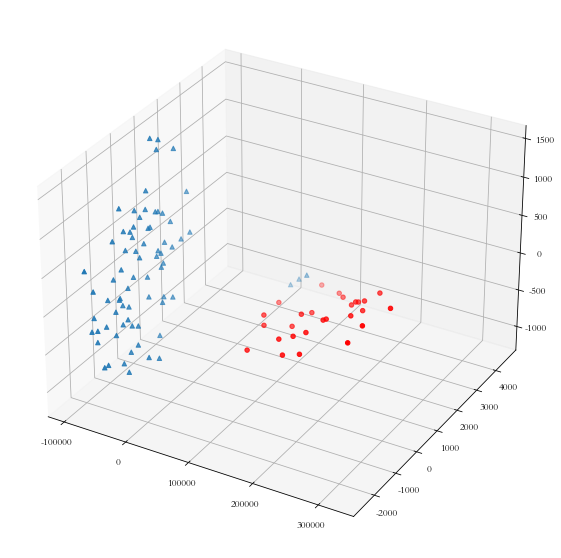

In [21]:

from sklearn.cluster import KMeans,MiniBatchKMeans,AgglomerativeClustering,Birch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
time_start=time.time()
# 更改这里就行
clf0 = KMeans(n_clusters=2, random_state=2016)
time_end=time.time()
pred0 = clf0.fit_predict(data)
sil = silhouette_score(data, clf0.labels_, metric='euclidean')
# print("轮廓系数",sil)
Y = 70*[0]+30*[1]
print_precison_recall_f1(Y,pred0)
# 耗时
print('耗时: ',time_end-time_start,'s')
pca = PCA(n_components=3)  # 输出两维
newData0 = pca.fit_transform(data)  # 载入N维

x1, y1, z1 = [], [], []
x2, y2, z2 = [], [], []
x3, y3, z3 = [], [], []
for index, value in enumerate(pred0):
    if value == 0:
        x1.append(newData0[index][0])
        y1.append(newData0[index][1])
        z1.append(newData0[index][2])
    elif value == 1:
        x2.append(newData0[index][0])
        y2.append(newData0[index][1])
        z2.append(newData0[index][2])
plt.figure(figsize=(10, 10))

# #定义坐标轴
ax1 = plt.axes(projection='3d')
ax1.scatter3D(x1, y1,z1, marker='^')
ax1.scatter3D(x2, y2,z2, marker='o',c='r')
plt.savefig('数据分布三维.png',dpi=300)
plt.show()
